In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pprint

from bs4 import BeautifulSoup as Soup
from fastkml import  kml


In [2]:
breweries_kml = "Denver_Brewery_Guide.kml"
with open ("Denver_Brewery_Guide.kml") as data:
    brewery_soup = Soup(data, "lxml-xml")
coords = brewery_soup.find_all('coordinates') 
coords_list = []
for x in coords:
    coords_list.append(str(x)) # store the coordinates in a list
    

In [3]:
brewery_names = brewery_soup.find_all('name') # find all the coordinates
names_list = []
for x in brewery_names:
    names_list.append(str(x)) # store the coordinates in a list

In [4]:
# create new dataframe
coord_col = ['Longitude', 'Latitude', 'Placemark']
df_coord = pd.DataFrame(columns=coord_col) 
# split coordinates list into coordinates to populate the dataframe
for i, j in zip(range(len(coords_list)), range(2, len(names_list))):
    item = coords_list[i]
    string_split = item.split(',')
    coord1 = float(string_split[0][26:])
    coord2 = float(string_split[1])
    coord3 = names_list[j][6:-7]
    df_coord.loc[i] = [coord1, coord2, coord3]

In [5]:
df_coord.nunique()

Longitude    97
Latitude     97
Placemark    96
dtype: int64

In [6]:
df_coord.head(20)

,Longitude,Latitude,Placemark
0,-104.972814,39.769741,Black Shirt Brewing Co
1,-104.932437,39.703027,Bull &amp; Bush
2,-104.891340,39.692681,Copper Kettle Brewing Company
3,-104.979568,39.768771,Crooked Stave Artisan Beer Project
4,-105.043517,39.776111,De Steeg Brewing
5,-105.007108,39.758362,Denver Beer Co
6,-104.997416,39.754960,Denver ChopHouse &amp; Brewery
7,-104.981415,39.763320,Epic Brewing Company
8,-104.988457,39.753656,Great Divide Brewing Co
9,-105.045073,39.758255,Hogshead Brewery


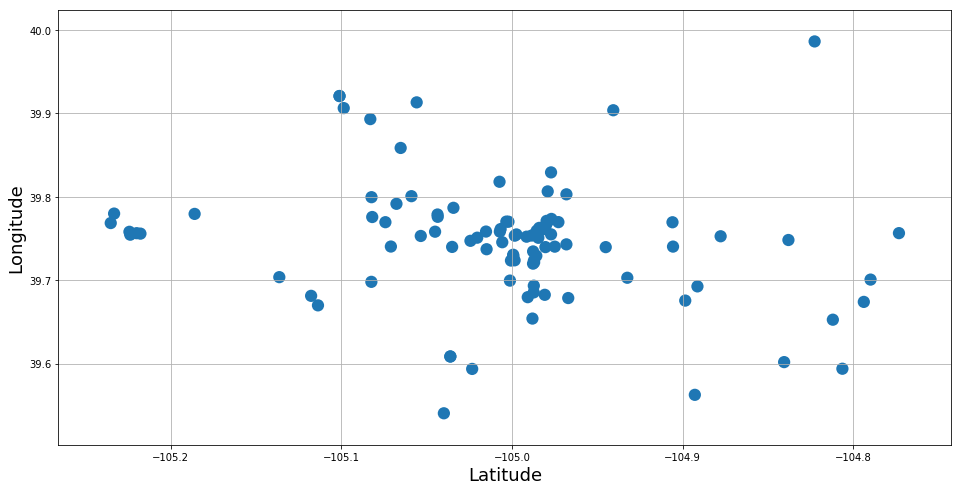

In [7]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df_coord['Longitude'], df_coord['Latitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()

### Using K-means Clustering for brewery geo locations 

In [8]:
#importing KMeans 
from sklearn.cluster import KMeans
#Creating an instance of Kmeans to find 10 clusters 
kmeans_one = KMeans(n_clusters = 15)


In [9]:
#Use fit_predict to cluster the points 
X = df_coord[['Longitude','Latitude']].values
predictions = kmeans_one.fit_predict(X)

In [10]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [11]:
clustered.drop('index', axis=1, inplace=True)


In [12]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9,
    clustered['Cluster'] ==10,
    clustered['Cluster'] ==11,
    clustered['Cluster'] ==12,
    clustered['Cluster'] ==13,
    clustered['Cluster'] ==14]
choices = ['Monday1', 'Tuesday1', 'Wednesday1', 'Thursday1', 'Friday1','Saturday1', 
           'Sunday1', 'Monday2', 'Tuesday2', 'Wednesday2','Thursday2','Friday2','Saturday2','Sunday2','Monday2' ]
clustered['Drinking Day of the Week'] = np.select(conditions, choices, default='black')

In [13]:
clustered.sort_values(by=['Cluster'])


,Longitude,Latitude,Placemark,Cluster,Drinking Day of the Week
11,-105.006671,39.761390,Prost Brewing Company,0,Monday1
44,-105.005704,39.745642,Tivoli Brewing Co. Tap House,0,Monday1
55,-105.020379,39.751069,Briar Common Brewery + Eatery,0,Monday1
56,-105.015233,39.758422,Zuni Street Brewing Company,0,Monday1
14,-104.998373,39.753504,Wynkoop Brewing Company,0,Monday1
23,-105.003318,39.770354,Diebolt Brewing Company,0,Monday1
43,-105.002087,39.770226,Factotum Brewhouse,0,Monday1
42,-105.024345,39.747316,Little Machine Beer,0,Monday1
6,-104.997416,39.754960,Denver ChopHouse &amp; Brewery,0,Monday1
5,-105.007108,39.758362,Denver Beer Co,0,Monday1


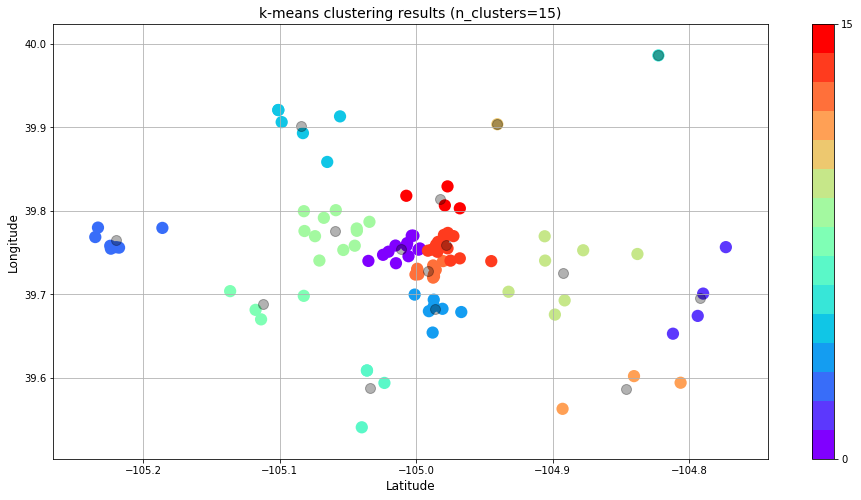

In [14]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,16,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,15,2))
centers = kmeans_one.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('k-means clustering results (n_clusters=15)', fontsize=14)
plt.grid()
plt.show()

In [15]:
clustered.groupby(['Placemark','Drinking Day of the Week']).count().reset_index()["Drinking Day of the Week"].value_counts()

Sunday2       18
Monday1       12
Tuesday2      11
Saturday2     10
Monday2        8
Wednesday1     7
Thursday1      7
Wednesday2     7
Friday1        5
Tuesday1       4
Sunday1        3
Friday2        3
Thursday2      1
Saturday1      1
Name: Drinking Day of the Week, dtype: int64

## Since the earth is not flat HDBSCAN clustering method 

In [16]:
import hdbscan

In [17]:
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='haversine')
predictions = clusterer.fit_predict(rads)

In [18]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)

In [19]:
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9,
    clustered['Cluster'] ==10,
    clustered['Cluster'] ==11,
    clustered['Cluster'] ==12,
    clustered['Cluster'] ==13]
choices = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
clustered['Drinking Day of the Week'] = np.select(conditions, choices, default='black')

In [20]:
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Placemark,Cluster,Drinking Day of the Week
0,-104.972814,39.769741,Black Shirt Brewing Co,-1,1
28,-105.001200,39.699624,Chain Reaction Brewing Company,-1,1
34,-105.058936,39.800845,Odyssey Beerwerks Brewery &amp; Taproom,-1,1
38,-104.980802,39.682588,Platt Park Brewing Company,-1,1
40,-104.968122,39.743073,Deep Draft Brewing Co.,-1,1
42,-105.024345,39.747316,Little Machine Beer,-1,1
45,-104.945080,39.739752,Cerebral Brewing,-1,1
51,-105.055857,39.913322,Wonderland Brewing Company,-1,1
59,-104.968108,39.803077,Zephyr Brewing Company,-1,1
22,-104.974929,39.740326,Alpine Dog Brewing Company,-1,1


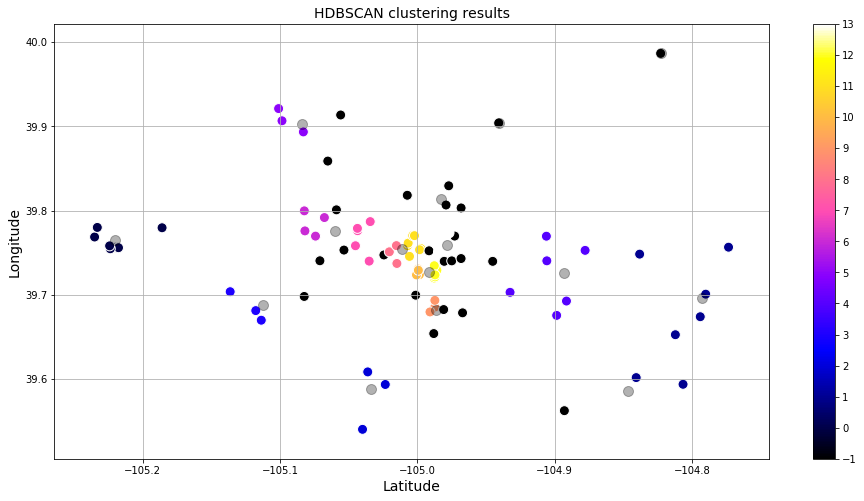

In [21]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='white')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
centers = kmeans_one.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()

In [22]:
dict_of_breweries = {k: v for k, v in clustered.groupby('Drinking Day of the Week')}

In [23]:
pprint.pprint(dict_of_breweries)

{'1':      Longitude   Latitude                                Placemark  Cluster  \
0  -104.972814  39.769741                   Black Shirt Brewing Co       -1   
15 -104.991463  39.752273            Jagged Mountain Craft Brewery       -1   
19 -104.967046  39.678709          FERMÃ†NTRA Brewery and Tap Room       -1   
21 -104.980410  39.739778             Lost Highway Brewing Company       -1   
22 -104.974929  39.740326               Alpine Dog Brewing Company       -1   
28 -105.001200  39.699624           Chain Reaction Brewing Company       -1   
34 -105.058936  39.800845  Odyssey Beerwerks Brewery &amp; Taproom       -1   
38 -104.980802  39.682588               Platt Park Brewing Company       -1   
40 -104.968122  39.743073                   Deep Draft Brewing Co.       -1   
42 -105.024345  39.747316                      Little Machine Beer       -1   
45 -104.945080  39.739752                         Cerebral Brewing       -1   
51 -105.055857  39.913322               Wonder

In [25]:
clustered.to_csv('brewery_file.csv', index=False)